# Exploring Supervised Machine learning

Q1)In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear
regression task as it involves just two variables.
Data can be found at http://bit.ly/w-data What will be predicted score if a student study for 9.25 hrs in a day?
Sample Solution :
https://drive.google.com/file/d/1koGHPElsHuXo9HPL4BQkZWRMJkOEHiv4/view

In [5]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# import dataset from remote location
u = 'http://bit.ly/w-data'
s_df = pd.read_csv(u)
print('Data Successfully imported')
#Print the first 5 records
s_df.head()    

Data Successfully imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Representation of Statistical data

In [7]:
s_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


We are now checking for the datatype of each column in this dataframe and also trying to find how much null values it contains,

In [8]:
s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


<h3>Visualizing data</h3>

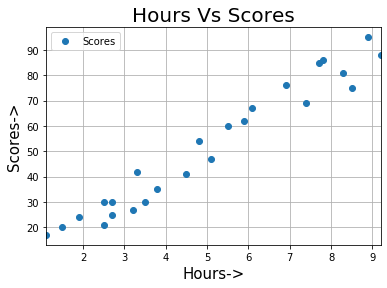

In [9]:
s_df.plot(x='Hours',y='Scores',style='o')
plt.ylabel('Scores->',fontsize=15)
plt.xlabel('Hours->',fontsize=15)
plt.title('Hours Vs Scores',fontsize=20)
plt.grid()
plt.show()

<h5> As from the above visualizations you see there is positive linear relationship as you study more the more you get the marks. </h5>

<h3>Preparing Data and splitting into train and test sets</h3>

In [10]:
#divide the data into input and output features
X = s_df.iloc[:,:-1].values
y = s_df.iloc[:,1].values

Splitting the data into training and testing sets by train_test_split method from scikit learn.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<h3>Training the Model<h3>

In [13]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print('Model Trained Successfully')

Model Trained Successfully


Plotting the Regression Line

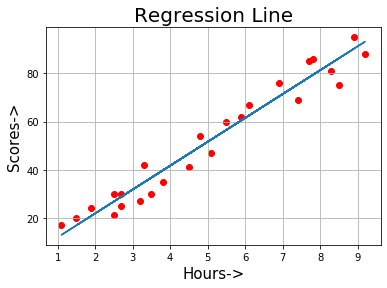

In [14]:
line = linear_model.coef_ * X + linear_model.intercept_
plt.scatter(X,y,color='red')
plt.plot(X,line)
plt.grid()
plt.ylabel('Scores->',fontsize=15)
plt.xlabel('Hours->',fontsize=15)
plt.title('Regression Line',fontsize=20)
plt.show()

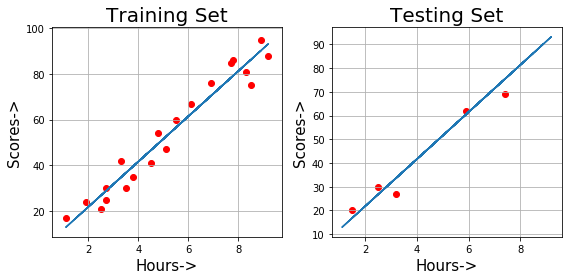

In [15]:
fig, axes = plt.subplots(1,2,figsize=(8,4))

#Training Set

axes[0].plot(X,line)
axes[0].scatter(X_train,y_train,color='red')
axes[0].grid()
axes[0].set_xlabel('Hours->',fontsize=15)
axes[0].set_ylabel('Scores->',fontsize=15)
axes[0].set_title('Training Set',fontsize=20)

#Testing Set

axes[1].plot(X,line)
axes[1].scatter(X_test,y_test,color='red')
axes[1].grid()
axes[1].set_xlabel('Hours->',fontsize=15)
axes[1].set_ylabel('Scores->',fontsize=15)
axes[1].set_title('Testing Set',fontsize=20)
fig.tight_layout()

<h3> Making Predictions </h3>

In [16]:
print(X_test) # Test data - In Hours
y_pred = linear_model.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
print(y_pred)  # Predicted scores 

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


Comparing actual Vs predicted scores

In [18]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) #Creating dataframe 
pred_df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Visualization for Actual Vs predicted values

[]

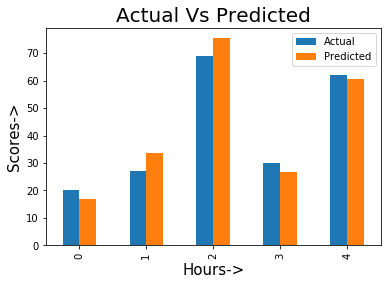

In [19]:
pred_df.plot(kind='bar')
plt.title('Actual Vs Predicted',fontsize=20)
plt.xlabel('Hours->',fontsize=15)
plt.ylabel('Scores->',fontsize=15)
plt.plot()

As per the above visualizations the actual and predicted value are closer to each other.

Predicted Score for student studying for 9.25 hours.

In [25]:
hours = 9.25
own_pred = linear_model.predict([[hours]])
print("No of Hours : %f" %hours)
print("Predicted Score : %f" %own_pred)

No of Hours : 9.250000
Predicted Score : 93.691732


<h3> Predicting Accuracy score for Linear Model </h3>

In [26]:
linear_model.score(X_train, y_train)  #Accuracy for training data

0.9515510725211553

In [27]:
linear_model.score(X_test, y_test)  #Accuracy for testing data

0.9454906892105356

<h3> Evaluating the model </h3>

In [28]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [29]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 4.6474476121003665


<h3>Conclusion</h3>
